In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
drop_movies_without_synopsis = True
keep_us_movies_only = False

In [3]:
columns = ["WikiID", "FreebaseID", "Name", "ReleaseDate", "BoxOfficeRevenue", "Runtime", "Languages", "Countries", "Genres"]
df_meta = pd.read_csv("../data/movie.metadata.tsv", sep="\t", names=columns)
df_meta.loc[df_meta["WikiID"]==29666067, "ReleaseDate"] = "2010-12-02"
df_meta["ReleaseDate"] = pd.to_datetime(df_meta["ReleaseDate"])
df_meta = df_meta[~df_meta["ReleaseDate"].isna()]

In [4]:
print("% of movies without revenue information:", df_meta["BoxOfficeRevenue"].isna().sum() / df_meta["BoxOfficeRevenue"].shape[0])

% of movies without revenue information: 0.8887211213404775


In [29]:
(~df_meta["BoxOfficeRevenue"].isna()).sum()

7530

In [5]:
if drop_movies_without_synopsis:
    df_synopsis = pd.read_csv("../data/plot_summaries.txt", sep="\t", names=["WikiID", "synopsis"])
    print("% of movies without synopsis:", df_synopsis.shape[0] / df_meta.shape[0])
    df_meta = df_meta[df_meta["WikiID"].isin(df_synopsis["WikiID"])]
df_meta["ReleasePeriod"] = pd.qcut(df_meta["ReleaseDate"].dt.year, 10)

% of movies without synopsis: 0.5652534106548724


In [6]:
def remove_fb_id(row):
    row = eval(row)
    new_row = []
    for id, cat in row.items():
        new_row.append(cat)
    return new_row

In [7]:
# df = df_meta.copy()
# df["genres"] = df["genres"].apply(remove_fb_id)
# df = df.explode("genres")

In [8]:
# df_synopsis = pd.read_csv("plot_summaries.txt", sep="\t", names=["IDwiki", "synopsis"])
# df_full = df_meta.merge(df_synopsis, on="IDwiki").sort_values("release")
# df_full.head(3)

In [9]:
# df_meta = df_full

In [10]:
countries = df_meta["Countries"].apply(remove_fb_id).explode()
df_countries = pd.merge(df_meta[["WikiID"]], countries, left_index=True, right_index=True)

genres = df_meta["Genres"].apply(remove_fb_id).explode()
df_genres = pd.merge(df_meta["WikiID"], genres, left_index=True, right_index=True)

languages = df_meta["Languages"].apply(remove_fb_id).explode()
df_languages = pd.merge(df_meta["WikiID"], languages, left_index=True, right_index=True)

In [11]:
usa_ids = df_countries[df_countries["Countries"] == "United States of America"]["WikiID"]
if keep_us_movies_only:
    df_meta = df_meta[df_meta["WikiID"].isin(usa_ids)]
    df_meta.loc[:, "ReleasePeriod"] = pd.qcut(df_meta["ReleaseDate"].dt.year, 10)

In [38]:
movie_counts_by_period = df_meta.groupby("ReleasePeriod")["WikiID"].count()
genre_list = df_genres["Genres"].value_counts()[10:15].index # Only plot the most popular genres
genre_dfs = {}
for g in genre_list:
    df_g = df_meta[["WikiID", "ReleasePeriod"]].merge(df_genres[df_genres["Genres"] == g], on="WikiID")
    genre_dfs[g] = df_g.groupby("ReleasePeriod")["WikiID"].count() / movie_counts_by_period

Text(0, 0.5, '% of movies produced')

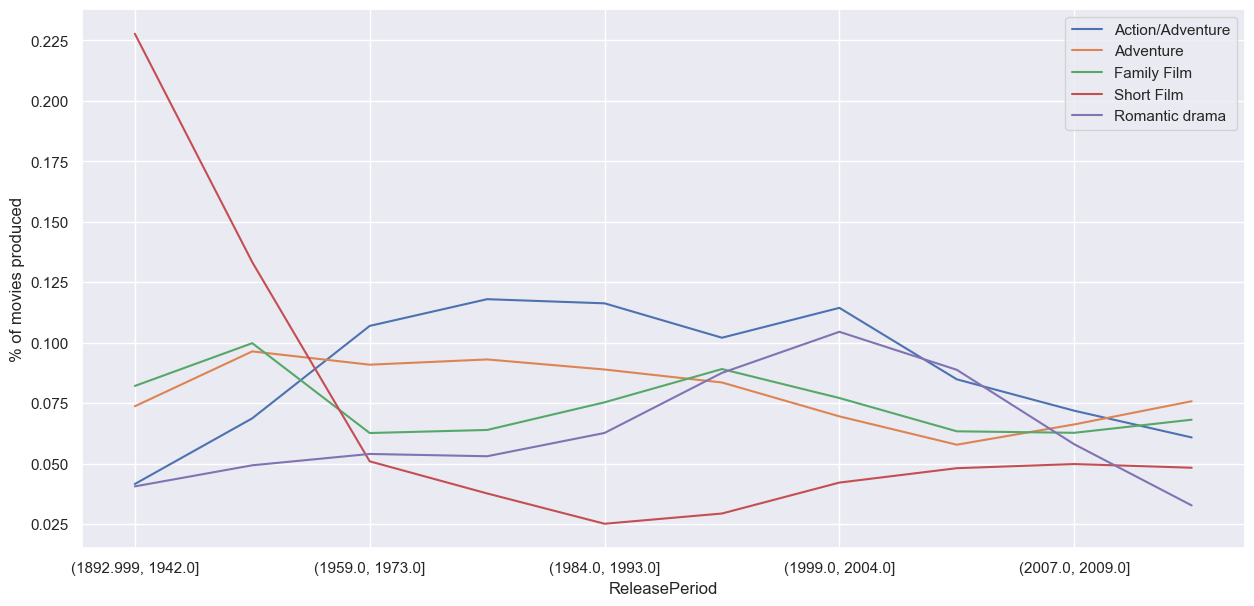

In [39]:
pd.concat(genre_dfs.values(), axis=1, keys=genre_list).plot.line(figsize=(15,7))
plt.ylabel("% of movies produced")

In [30]:
df_meta[(df_meta["ReleaseDate"] == "1999") & (~df_meta["BoxOfficeRevenue"].isna())]

,WikiID,FreebaseID,Name,ReleaseDate,BoxOfficeRevenue,Runtime,Languages,Countries,Genres,ReleasePeriod
15587,25910532,/m/04j2n3w,A Dog of Flanders,1999-01-01,2148212.0,113.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/02h8pkk"": ""Fam...","(1993.0, 1999.0]"
26645,12894538,/m/02xbcp6,Light it Up,1999-01-01,5985690.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01lrrt"": ""Me...","(1993.0, 1999.0]"
31686,26443897,/m/0bbvtwk,Agnes Browne,1999-01-01,148853.0,92.0,{},"{""/m/03rt9"": ""Ireland""}","{""/m/04xvlr"": ""Period piece"", ""/m/07s9rl0"": ""D...","(1993.0, 1999.0]"
43985,9793561,/m/02pscpb,A Slipping-Down Life,1999-01-01,107099.0,111.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0219x_"": ""Indie"", ""/m/03p5xs"": ""Comedy of...","(1993.0, 1999.0]"
50723,3296177,/m/093_k0,Virus,1999-01-01,30652005.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""H...","(1993.0, 1999.0]"
53678,1458772,/m/05353r,Muppets from Space,1999-01-01,22323612.0,88.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil...","(1993.0, 1999.0]"
56821,348356,/m/01yzjg,Bringing Out the Dead,1999-01-01,16797191.0,121.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/060__y"": ""Film ada...","(1993.0, 1999.0]"
56849,4032727,/m/0bdj76,Molly,1999-01-01,15593.0,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/07s9rl0"": ...","(1993.0, 1999.0]"
58128,3879782,/m/0b4rz4,Best Laid Plans,1999-01-01,27816.0,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...","(1993.0, 1999.0]"
59959,11107075,/m/02r07nx,Bats,1999-01-01,10155690.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06vxwl5"": ""Natur...","(1993.0, 1999.0]"


In [14]:
# ((df.release >= "1995-01-01") & (df.release < "2001-01-01")).sum()

In [15]:
# df_nonan = df[(~df.release.isna()) & (~df.revenue.isna()) & (~df.runtime.isna())]
# df_nonan = df_nonan.sort_values("release")
# df_usa = df_nonan[df_nonan["countries"] == '{"/m/09c7w0": "United States of America"}']